## Introduction

Hello, my readers, I'm Parthiv. Quick note: **This file will have a lot of playing around and searching for trends!** The `dist/` directory will have a lot of the final graphs and analysis, so make sure to explore that after. I'll try to explain what I'm doing as we go on, but I apologize if anything's unclear.


In [42]:
from platform import system

# Importing necessary libraries
# pip install pandas numpy matplotlib seaborn plotly scienceplots

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import linregress


### Config for Matplotlib, Seaborn, Plotly, LaTeX

Style config. Prioritizing aesthetics but also should be scientifically appropriate.

In [43]:
# Set global figure size
plt.rcParams['figure.figsize'] = [10, 6]

# Set font sizes
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 16

plt.rcParams['figure.autolayout'] = True

sns.set_style('whitegrid')
sns.set_context('notebook', font_scale=1.2)

import plotly.io as pio
pio.templates.default = "plotly_white"

plt.rcParams['text.usetex'] = True


In [44]:
# Color palettes

custom_palette = sns.color_palette('Set2')
sns.set_palette(custom_palette)

from cycler import cycler

# Define a custom color cycle
colors = ['#4E79A7', '#F28E2B', '#E15759', '#76B7B2', '#59A14F']
plt.rcParams['axes.prop_cycle'] = cycler(color=colors)


In [45]:
# Fonts
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

## Pre-processing
Load data into dataframes, perform initial inspection, handle missing values & incorrect data types

In [46]:
titles = pd.read_csv('titles.csv')
credits = pd.read_csv('credits.csv')
print("Titles Dataset:")
display(titles.head())

print("Credits Dataset:")
display(credits.head())


Titles Dataset:


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600


Credits Dataset:


,person_id,id,name,character,role
0,3748,tm84618,Robert De Niro,Travis Bickle,ACTOR
1,14658,tm84618,Jodie Foster,Iris Steensma,ACTOR
2,7064,tm84618,Albert Brooks,Tom,ACTOR
3,3739,tm84618,Harvey Keitel,Matthew 'Sport' Higgins,ACTOR
4,48933,tm84618,Cybill Shepherd,Betsy,ACTOR


In [47]:
print(f"Titles dataset shape: {titles.shape}")
print(f"Credits dataset shape: {credits.shape}")


Titles dataset shape: (5849, 15)
Credits dataset shape: (77801, 5)


In [48]:
print("Titles Dataset Info:")
print(titles.info())

print("\nCredits Dataset Info:")
print(credits.info())

Titles Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5849 entries, 0 to 5848
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5849 non-null   object 
 1   title                 5848 non-null   object 
 2   type                  5849 non-null   object 
 3   description           5831 non-null   object 
 4   release_year          5849 non-null   int64  
 5   age_certification     3230 non-null   object 
 6   runtime               5849 non-null   int64  
 7   genres                5849 non-null   object 
 8   production_countries  5849 non-null   object 
 9   seasons               2106 non-null   float64
 10  imdb_id               5446 non-null   object 
 11  imdb_score            5367 non-null   float64
 12  imdb_votes            5351 non-null   float64
 13  tmdb_popularity       5758 non-null   float64
 14  tmdb_score            5538 non-null   float64
dtype

In [49]:
print("Missing Values in Titles Dataset:")
print(titles.isnull().sum())

print("\nMissing Values in Credits Dataset:")
print(credits.isnull().sum())

print("Percentage of Missing Values in Titles Dataset:")
print((titles.isnull().sum() / len(titles)) * 100)

print("\nPercentage of Missing Values in Credits Dataset:")
print((credits.isnull().sum() / len(credits)) * 100)


Missing Values in Titles Dataset:
id                         0
title                      1
type                       0
description               18
release_year               0
age_certification       2619
runtime                    0
genres                     0
production_countries       0
seasons                 3743
imdb_id                  403
imdb_score               482
imdb_votes               498
tmdb_popularity           91
tmdb_score               311
dtype: int64

Missing Values in Credits Dataset:
person_id       0
id              0
name            0
character    9772
role            0
dtype: int64
Percentage of Missing Values in Titles Dataset:
id                       0.000000
title                    0.017097
type                     0.000000
description              0.307745
release_year             0.000000
age_certification       44.776885
runtime                  0.000000
genres                   0.000000
production_countries     0.000000
seasons                 6

In [50]:
titles = titles.dropna(subset=['title'])
titles['description'] = titles['description'].fillna('No description available.')
titles['age_certification'] = titles['age_certification'].fillna('Not Rated')
titles['seasons'] = titles['seasons'].fillna(0).astype(int)
credits['character'] = credits['character'].fillna('Unknown Character')

In [51]:
titles['runtime'] = titles['runtime'].astype(int)
titles['release_year'] = titles['release_year'].astype(int)
titles = titles.drop_duplicates()
credits = credits.drop_duplicates()
titles['type'] = titles['type'].str.strip().str.upper()

## EDA
EDA - Exploratory data analysis


We will try to explore four things here:
- Shift Towards Diversity and Social Issues
- Global Expansion Reflected in Production Countries
- Simplification of Content Descriptions Over Time
- Diversity in the Acting Crew Over Time

We will start with the shift towards diversity and social issues.


### Shift towards Diversity and Social Issues
- Demonstrate an increase in Netflix content focusing on diversity and social issues over time.
- NLP (Natural Language Processing) to analyze descriptions and titles for relevant keywords, sentiment, and topics.
- Visualize trends to support the claim.

In [52]:
# Relevant keywords
diversity_keywords = [
    'diversity', 'inclusion', 'equality', 'race', 'ethnicity', 'gender', 'identity', 'lgbtq', 'minority', 'empowerment',
    'mental health', 'climate change', 'environment', 'justice', 'poverty', 'discrimination', 'immigration', 'violence',
    'abuse', 'human rights', 'activism', 'social justice', 'culture', 'civil rights', 'intersectionality', 'accessibility',
    'sustainability', 'refugee', 'gender equality', 'women', 'indigenous', 'religion', 'class', 'ageism', 'ableism'
]

In [53]:
import re
import nltk

nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Parthiv\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Parthiv\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Parthiv\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


We will now do a little preprocessing for this analysis

In [54]:
titles['description'] = titles['description'].astype(str).str.lower() # Convert to lowercase
# Use a regex to remove every character except the alphabet
titles['description'] = titles['description'].apply(lambda x: re.sub(r'[^a-z\s]', '', x))

titles['tokens'] = titles['description'].apply(word_tokenize)
stop_words = set(stopwords.words('english'))

# remove stopwords like of, on, an, in, to
titles['tokens'] = titles['tokens'].apply(lambda x: [word for word in x if word not in stop_words])

print(titles.head())

         id                                title   type  \
0  ts300399  Five Came Back: The Reference Films   SHOW   
1   tm84618                          Taxi Driver  MOVIE   
2  tm154986                          Deliverance  MOVIE   
3  tm127384      Monty Python and the Holy Grail  MOVIE   
4  tm120801                      The Dirty Dozen  MOVIE   

                                         description  release_year  \
0  this collection includes  world war iiera prop...          1945   
1  a mentally unstable vietnam war veteran works ...          1976   
2  intent on seeing the cahulawassee river before...          1972   
3  king arthur accompanied by his squire recruits...          1975   
4   american military prisoners in world war ii a...          1967   

  age_certification  runtime                                       genres  \
0             TV-MA       51                            ['documentation']   
1                 R      114                           ['drama', 'crim

In [55]:
# Include individual words from phrases
expanded_keywords = set()
for phrase in diversity_keywords:
    for word in phrase.split():
        expanded_keywords.add(word)

def count_keywords(tokens):
    return sum(1 for word in tokens if word in expanded_keywords)

titles['keyword_count'] = titles['tokens'].apply(count_keywords)
print(titles.sort_values(by='keyword_count', ascending=False).head())

            id                             title   type  \
4239  tm469432             Hating Peter Tatchell  MOVIE   
4341  tm907704        Dark City Beneath the Beat  MOVIE   
4569  tm813423  Marjoun and the Flying Headscarf  MOVIE   
4003  tm977464                       Youth v Gov  MOVIE   
2440  tm365670            Perú: Tesoro Escondido  MOVIE   

                                            description  release_year  \
4239  the powerful and inspiring true story of the c...          2020   
4341  dark city beneath the beat is an audiovisual e...          2020   
4569  a teenager in arkansas searches for identity i...          2019   
4003  how can we bring accountability over the clima...          2020   
2440  per tesoro escondido is a documentary genre fi...          2017   

     age_certification  runtime                      genres  \
4239         Not Rated       91           ['documentation']   
4341         Not Rated       65  ['documentation', 'music']   
4569         Not 

In [56]:
# Keyword counts by year
keyword_trends = titles.groupby('release_year')['keyword_count'].sum().reset_index()
# Titles per year
titles_per_year = titles.groupby('release_year').size().reset_index(name='title_count')

# Merge the two dfs
keyword_trends = keyword_trends.merge(titles_per_year, on='release_year')
# Calculate average keyword occurrences per title
keyword_trends['avg_keywords_per_title'] = keyword_trends['keyword_count'] / keyword_trends['title_count']

print(keyword_trends.sort_values(by='avg_keywords_per_title', ascending=False).head())

    release_year  keyword_count  title_count  avg_keywords_per_title
14          1974              1            1                1.000000
18          1978              1            1                1.000000
19          1979              3            5                0.600000
15          1975              1            2                0.500000
40          2000              5           11                0.454545


#### Graphing diversity keywords
##### Graphing total diversity keywords over time
The total occurrences shows that diversity has become a bigger topic overall, but the average keyword occurrences per movie is a little random because in some years, there were only a few movies, leading to fluctuations.
The correlation coefficient (r^2 was only 0.02, which is probably insignificant), so I'll just put in the overall graph and show that netflix treated it as a more important topic recently

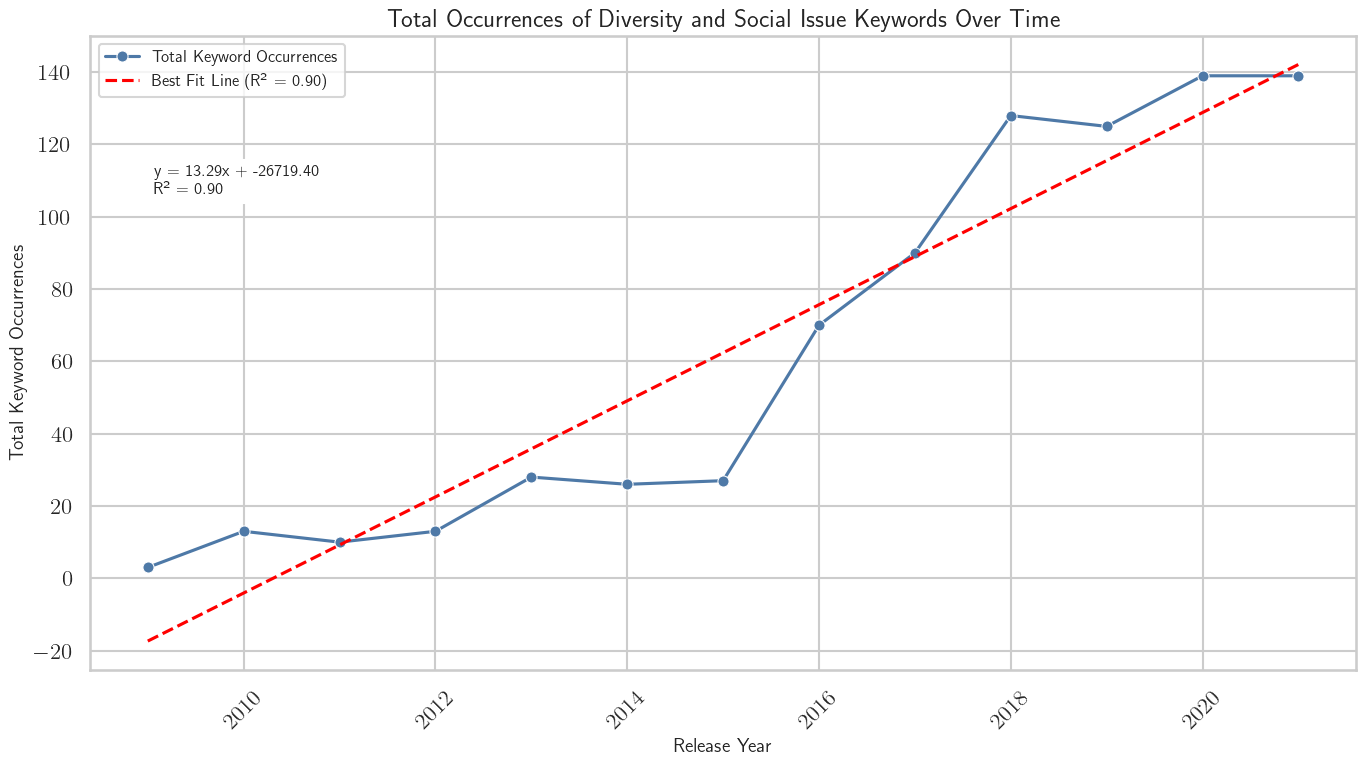

In [83]:
keyword_trends = keyword_trends.query('release_year != 2022')
keyword_trends = keyword_trends.query('release_year > 2008')

sns.set_style('whitegrid')
sns.set_context('talk')
plt.rcParams['text.usetex'] = True
plt.figure(figsize=(14, 8))

sns.lineplot(data=keyword_trends, x='release_year', y='keyword_count', marker='o', markersize=8, label='Total Keyword Occurrences')

# Linear regression
slope, intercept, r_value, p_value, std_err = linregress(keyword_trends['release_year'], keyword_trends['keyword_count'])
x_vals = np.array(keyword_trends['release_year'])
y_vals = intercept + slope * x_vals
plt.plot(x_vals, y_vals, color='red', linestyle='--', label=f'Best Fit Line (R² = {r_value**2:.2f})')

# Annotation
equation_text = f'y = {slope:.2f}x + {intercept:.2f}\nR² = {r_value**2:.2f}'
plt.annotate(equation_text, xy=(0.05, 0.75), xycoords='axes fraction', fontsize=12, backgroundcolor='white')

# Customize plot
plt.title('Total Occurrences of Diversity and Social Issue Keywords Over Time', fontsize=18)
plt.xlabel('Release Year', fontsize=14)
plt.ylabel('Total Keyword Occurrences', fontsize=14)
plt.xticks(rotation=45)
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig('dist/total_keyword_occurrences_over_time.png')
plt.show()

##### Diversity keywords per title over time

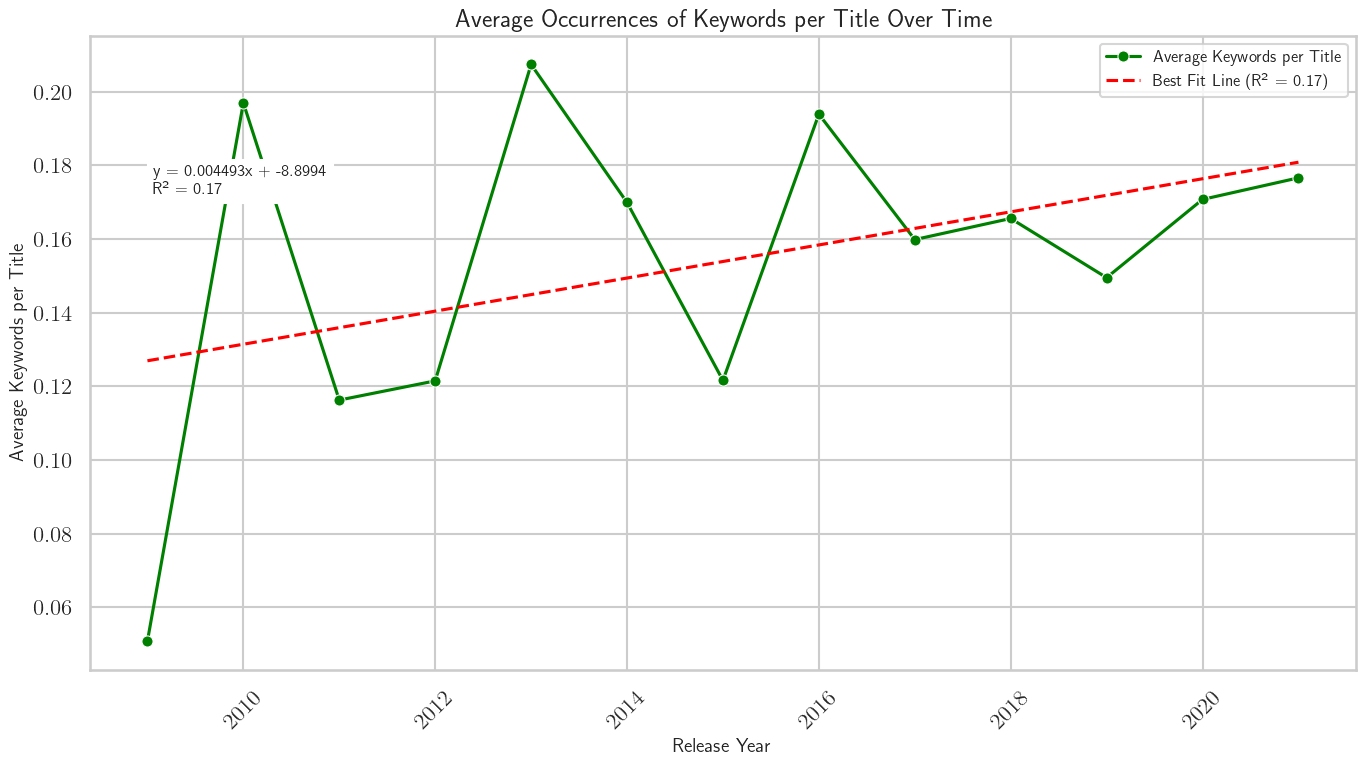

In [58]:
plt.figure(figsize=(14, 8))

# Plotting the average keywords per title
sns.lineplot(
    data=keyword_trends,
    x='release_year',
    y='avg_keywords_per_title',
    marker='o',
    markersize=8,
    color='green',
    label='Average Keywords per Title'
)

# Linear regression
slope, intercept, r_value, p_value, std_err = linregress(
    keyword_trends['release_year'],
    keyword_trends['avg_keywords_per_title']
)
x_vals = np.array(keyword_trends['release_year'])
y_vals = intercept + slope * x_vals

# Plot the best fit line
plt.plot(
    x_vals,
    y_vals,
    color='red',
    linestyle='--',
    label=f'Best Fit Line (R² = {r_value**2:.2f})'
)

# Annotation
equation_text = f'y = {slope:.6f}x + {intercept:.4f}\nR² = {r_value**2:.2f}'
plt.annotate(
    equation_text,
    xy=(0.05, 0.75),
    xycoords='axes fraction',
    fontsize=12,
    backgroundcolor='white'
)

plt.title('Average Occurrences of Keywords per Title Over Time', fontsize=18)
plt.xlabel('Release Year', fontsize=14)
plt.ylabel('Average Keywords per Title', fontsize=14)
plt.xticks(rotation=45)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

#### Topic Modeling
Could show topic prevalence over time, but I chose not to. Just for fun!

In [59]:
from gensim import corpora, models
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS

titles['clean_description'] = titles['description'].apply(lambda x: re.sub(r'\s+', ' ', x))
titles['clean_description'] = titles['clean_description'].apply(lambda x: re.sub(r"\'", "", x))

def preprocess_text(text):
    result = []
    for token in simple_preprocess(text):
        if token not in STOPWORDS and token not in stop_words:
            result.append(token)
    return result

titles['processed_tokens'] = titles['clean_description'].apply(preprocess_text)

dictionary = corpora.Dictionary(titles['processed_tokens'])
corpus = [dictionary.doc2bow(text) for text in titles['processed_tokens']]

num_topics = 10  # Adjust as needed
lda_model = models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15, random_state=42)

# Print the topics
for idx, topic in lda_model.print_topics(-1):
    print(f'Topic: {idx}\nWords: {topic}\n')


Topic: 0
Words: 0.009*"life" + 0.007*"world" + 0.006*"love" + 0.005*"new" + 0.004*"family" + 0.004*"lives" + 0.004*"story" + 0.004*"series" + 0.003*"different" + 0.003*"years"

Topic: 1
Words: 0.010*"family" + 0.006*"young" + 0.005*"life" + 0.005*"mother" + 0.005*"christmas" + 0.004*"father" + 0.004*"new" + 0.004*"daughter" + 0.003*"love" + 0.003*"day"

Topic: 2
Words: 0.008*"standup" + 0.008*"special" + 0.007*"comedian" + 0.006*"world" + 0.006*"comedy" + 0.006*"love" + 0.005*"stories" + 0.005*"new" + 0.005*"friends" + 0.005*"family"

Topic: 3
Words: 0.008*"life" + 0.005*"young" + 0.004*"story" + 0.004*"takes" + 0.004*"world" + 0.004*"friends" + 0.003*"love" + 0.003*"unexpected" + 0.003*"new" + 0.003*"children"

Topic: 4
Words: 0.009*"series" + 0.006*"life" + 0.005*"world" + 0.004*"school" + 0.004*"friends" + 0.004*"new" + 0.003*"journey" + 0.003*"takes" + 0.003*"best" + 0.003*"music"

Topic: 5
Words: 0.006*"story" + 0.006*"life" + 0.005*"murder" + 0.004*"death" + 0.004*"war" + 0.004*"

### Global Expansion Reflected in Production Countries
Diversity in production countries.

In [60]:
titles['production_countries'].head()

0          ['US']
1          ['US']
2          ['US']
3          ['GB']
4    ['GB', 'US']
Name: production_countries, dtype: object

In [61]:
import ast

# Function to convert string representation of list to an actual list
def parse_countries(countries_str):
    try:
        # Evaluate the string as a Python expression
        countries = ast.literal_eval(countries_str)
        return countries
    except (ValueError, SyntaxError): return []

titles['country_list'] = titles['production_countries'].apply(parse_countries)

# Verify the result
titles[['production_countries', 'country_list']].head()

,production_countries,country_list
0,['US'],[US]
1,['US'],[US]
2,['US'],[US]
3,['GB'],[GB]
4,"['GB', 'US']","[GB, US]"


In [62]:
# 'Explode' to create one row per country
titles_exploded = titles.explode('country_list')
titles_exploded = titles_exploded.dropna(subset=['country_list'])
titles_exploded = titles_exploded.rename(columns={'country_list': 'country'})

titles_exploded[['id', 'title', 'release_year', 'country']].head()


,id,title,release_year,country
0,ts300399,Five Came Back: The Reference Films,1945,US
1,tm84618,Taxi Driver,1976,US
2,tm154986,Deliverance,1972,US
3,tm127384,Monty Python and the Holy Grail,1975,GB
4,tm120801,The Dirty Dozen,1967,GB


In [63]:
countries_per_year = titles_exploded.groupby('release_year')['country'].nunique().reset_index()
countries_per_year.columns = ['release_year', 'unique_countries']
countries_per_year

,release_year,unique_countries
0,1945,1
1,1954,2
2,1956,1
3,1958,1
4,1959,1
...,...,...
58,2018,68
59,2019,66
60,2020,62
61,2021,58


In [84]:
def simpson_diversity(group):
    counts = group['country'].value_counts()
    proportions = counts / counts.sum()
    D = (proportions ** 2).sum()
    return 1 - D  # Gini-Simpson index

# Calculate index per year
diversity_per_year = titles_exploded.groupby('release_year').apply(simpson_diversity).reset_index()

diversity_per_year.columns = ['release_year', 'simpson_diversity_index']
diversity_data = countries_per_year.merge(diversity_per_year, on='release_year')

diversity_data


,release_year,unique_countries,simpson_diversity_index
0,1945,1,0.000000
1,1954,2,0.500000
2,1956,1,0.000000
3,1958,1,0.000000
4,1959,1,0.000000
...,...,...,...
58,2018,68,0.866367
59,2019,66,0.863032
60,2020,62,0.847433
61,2021,58,0.874357


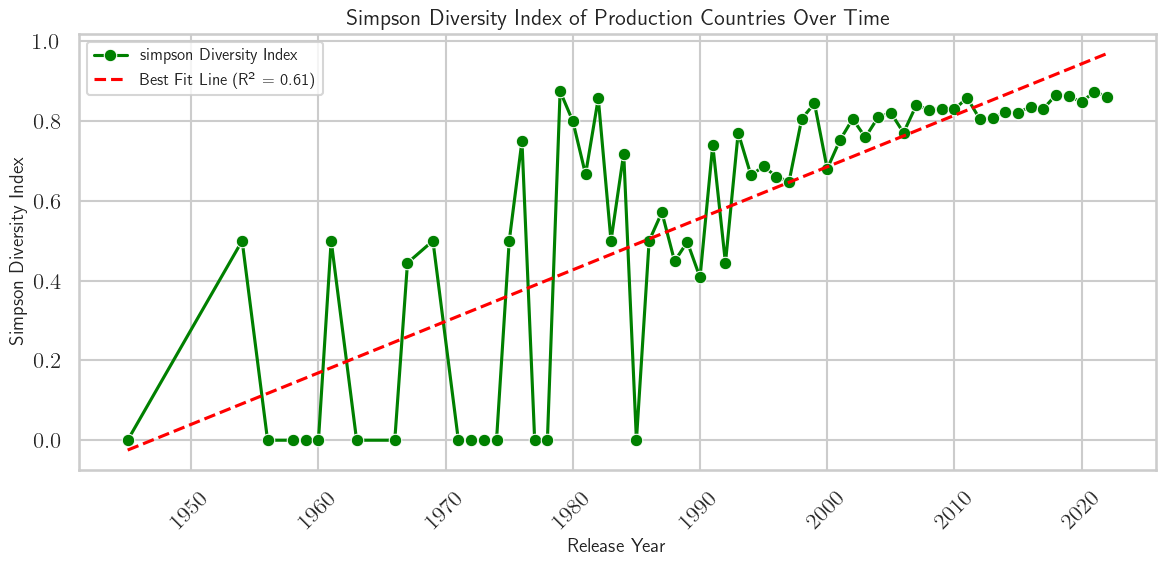

In [86]:
plt.figure(figsize=(12, 6))

sns.lineplot(
    data=diversity_data,
    x='release_year',
    y='simpson_diversity_index',
    marker='o',
    color='green',
    label='simpson Diversity Index'
)

slope, intercept, r_value, p_value, std_err = linregress(
    diversity_data['release_year'],
    diversity_data['simpson_diversity_index']
)
x_vals = diversity_data['release_year']

y_vals = intercept + slope * x_vals

plt.plot(
    x_vals,
    y_vals,
    color='red',
    linestyle='--',
    label=f'Best Fit Line (R² = {r_value**2:.2f})'
)

plt.title('Simpson Diversity Index of Production Countries Over Time', fontsize=16)
plt.xlabel('Release Year', fontsize=14)
plt.ylabel('Simpson Diversity Index', fontsize=14)
plt.xticks(rotation=45)
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig('dist/simpson_index_over_time.png', dpi=300)
plt.show()


### Diversity in the Acting Crew Over Time
Note: Inferring ethnicity from names is inherently imprecise due to name variations, cultural diversity, and other issues. Risk of inherent biases in the algorithms used to infer ethnicity.
Steps:
- Merge both CSVs to associate actors with titles and release years.
- Clean data to prepare for analysis
- Use a library or API to predict ethnicity
- Trend analysis, statistical analysis, underrepresented groups
- Visualization



In [66]:
import warnings
warnings.filterwarnings('ignore')

# Reload in to start from the beginning

credits = pd.read_csv('credits.csv')
titles = pd.read_csv('titles.csv')
credits['id'] = credits['id'].astype(str)
titles['id'] = titles['id'].astype(str)

# Merge datasets to get release years
credits_titles = pd.merge(credits, titles[['id', 'release_year']], on='id', how='left')

# Filter for actors
actors = credits_titles[credits_titles['role'] == 'ACTOR']

actors = actors.dropna(subset=['name'])

In [67]:
from ethnicolr import pred_wiki_name

# Extract names
actors['last'] = actors['name'].str.split().str[-1]
actors['first'] = actors['name'].str.split().str[0]

actors_ethnicity = actors[['last', 'first', 'release_year']].drop_duplicates()

# Predict ethnicity using the Wikipedia model (US-based)
actors_ethnicity = pred_wiki_name(actors_ethnicity, 'last', 'first')

actors_ethnicity['ethn'] = actors_ethnicity['race'].str.split(',').str[-1]

The ethnicolr models are trained on US census and voter data, primarily reflecting US demographics.
This may not accurately represent international actors, but we will proceed.

In [68]:
actors_ethnicity

,last,first,release_year,"Asian,GreaterEastAsian,EastAsian","Asian,GreaterEastAsian,Japanese","Asian,IndianSubContinent","GreaterAfrican,Africans","GreaterAfrican,Muslim","GreaterEuropean,British","GreaterEuropean,EastEuropean","GreaterEuropean,Jewish","GreaterEuropean,WestEuropean,French","GreaterEuropean,WestEuropean,Germanic","GreaterEuropean,WestEuropean,Hispanic","GreaterEuropean,WestEuropean,Italian","GreaterEuropean,WestEuropean,Nordic",race,ethn
0,Niro,Robert,1976.0,0.012049,0.047031,0.029132,0.130213,0.014515,0.181015,0.013213,0.175831,0.139924,0.021544,0.048019,0.183441,0.004073,"GreaterEuropean,WestEuropean,Italian",Italian
1,Foster,Jodie,1976.0,0.006233,0.003345,0.002169,0.002873,0.001224,0.769263,0.001962,0.139924,0.041455,0.002859,0.013614,0.014196,0.000883,"GreaterEuropean,British",British
2,Brooks,Albert,1976.0,0.001535,0.001731,0.002256,0.001637,0.001051,0.796243,0.006969,0.079935,0.087334,0.012641,0.005697,0.002421,0.000550,"GreaterEuropean,British",British
3,Keitel,Harvey,1976.0,0.003191,0.013871,0.014180,0.007563,0.016137,0.337384,0.014394,0.379177,0.013641,0.012281,0.034139,0.016845,0.137198,"GreaterEuropean,Jewish",Jewish
4,Shepherd,Cybill,1976.0,0.000834,0.003329,0.000486,0.000593,0.000326,0.941884,0.000459,0.040002,0.004027,0.000100,0.003182,0.004027,0.000752,"GreaterEuropean,British",British
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51146,Sánchez,Ana,2021.0,0.001521,0.004827,0.000731,0.032521,0.023502,0.006762,0.002530,0.022107,0.027097,0.000771,0.863111,0.013792,0.000728,"GreaterEuropean,WestEuropean,Hispanic",Hispanic
51147,Buscato,Adelaida,2021.0,0.005693,0.013675,0.000519,0.033836,0.002570,0.051684,0.005362,0.024421,0.035855,0.006641,0.116075,0.701710,0.001960,"GreaterEuropean,WestEuropean,Italian",Italian
51148,Luengas,Luz,2021.0,0.067729,0.011413,0.001357,0.018831,0.000688,0.006802,0.010106,0.004465,0.161473,0.004081,0.707811,0.003891,0.001353,"GreaterEuropean,WestEuropean,Hispanic",Hispanic
51149,Prieto,Inés,2021.0,0.000202,0.031973,0.000078,0.002560,0.000454,0.002435,0.000177,0.002055,0.040193,0.000457,0.907115,0.012152,0.000151,"GreaterEuropean,WestEuropean,Hispanic",Hispanic


In [69]:
ethnicity_counts = actors_ethnicity.groupby(['release_year', 'ethn']).size().reset_index(name='count')
ethnicity_pivot = ethnicity_counts.pivot(index='release_year', columns='ethn', values='count').fillna(0)
ethnicity_pivot['total'] = ethnicity_pivot.sum(axis=1)

# percentage for each ethnicity
for ethnicity in ethnicity_pivot.columns.drop('total'):
    ethnicity_pivot[f'{ethnicity}_percentage'] = (ethnicity_pivot[ethnicity] / ethnicity_pivot['total']) * 100

ethnicity_pivot.reset_index(inplace=True)
ethnicity_pivot = ethnicity_pivot.query('release_year > 1999')
ethnicity_pivot

ethn,release_year,Africans,British,EastAsian,EastEuropean,French,Germanic,Hispanic,IndianSubContinent,Italian,...,EastEuropean_percentage,French_percentage,Germanic_percentage,Hispanic_percentage,IndianSubContinent_percentage,Italian_percentage,Japanese_percentage,Jewish_percentage,Muslim_percentage,Nordic_percentage
38,2000.0,1.0,110.0,4.0,3.0,9.0,1.0,13.0,13.0,6.0,...,1.796407,5.389222,0.598802,7.784431,7.784431,3.592814,1.197605,1.796407,1.197605,0.000000
39,2001.0,7.0,146.0,0.0,1.0,12.0,3.0,26.0,35.0,15.0,...,0.340136,4.081633,1.020408,8.843537,11.904762,5.102041,3.741497,7.482993,4.081633,1.360544
40,2002.0,5.0,242.0,2.0,7.0,23.0,5.0,13.0,28.0,27.0,...,1.635514,5.373832,1.168224,3.037383,6.542056,6.308411,7.476636,7.242991,1.635514,1.401869
41,2003.0,10.0,300.0,20.0,1.0,23.0,6.0,9.0,34.0,15.0,...,0.204918,4.713115,1.229508,1.844262,6.967213,3.073770,4.508197,5.942623,2.254098,1.639344
42,2004.0,12.0,256.0,30.0,9.0,17.0,2.0,53.0,64.0,31.0,...,1.595745,3.014184,0.354610,9.397163,11.347518,5.496454,3.900709,6.205674,3.368794,2.482270
43,2005.0,5.0,253.0,19.0,7.0,16.0,6.0,18.0,16.0,26.0,...,1.612903,3.686636,1.382488,4.147465,3.686636,5.990783,3.225806,6.682028,2.995392,2.764977
44,2006.0,20.0,346.0,26.0,10.0,39.0,9.0,45.0,21.0,35.0,...,1.552795,6.055901,1.397516,6.987578,3.260870,5.434783,3.416149,6.677019,2.639752,1.708075
45,2007.0,16.0,345.0,27.0,19.0,44.0,18.0,44.0,98.0,30.0,...,2.383940,5.520703,2.258469,5.520703,12.296110,3.764115,7.277290,5.520703,4.893350,1.882058
46,2008.0,19.0,275.0,96.0,16.0,23.0,6.0,43.0,128.0,45.0,...,1.990050,2.860697,0.746269,5.348259,15.920398,5.597015,7.835821,6.467662,3.482587,1.243781
47,2009.0,17.0,324.0,84.0,10.0,10.0,1.0,18.0,65.0,29.0,...,1.564945,1.564945,0.156495,2.816901,10.172144,4.538341,2.503912,5.477308,3.442879,1.251956


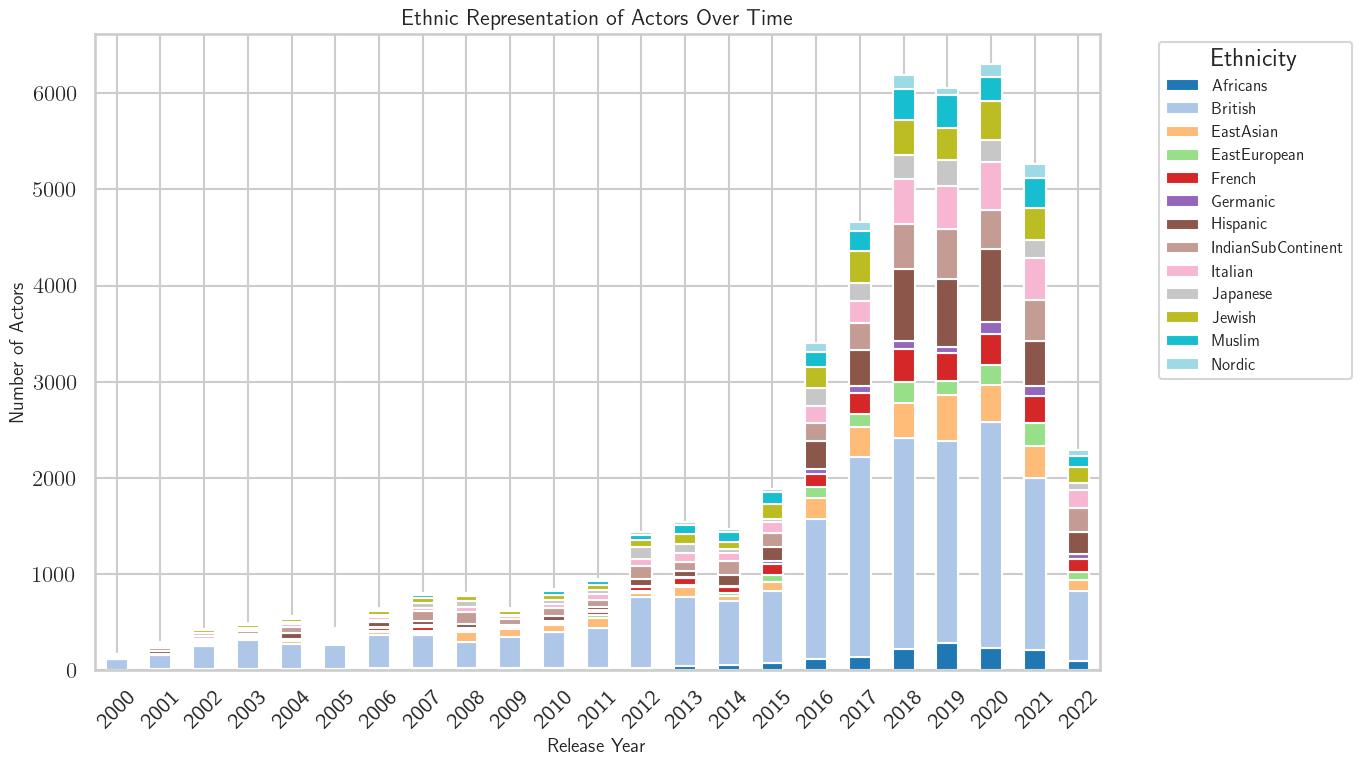

In [70]:
ethnicity_pivot = ethnicity_pivot.reset_index(drop=True)

# Remove the trailing .0
ethnicity_pivot['release_year'] = ethnicity_pivot['release_year'].astype(int)
ethnicity_pivot = ethnicity_pivot.sort_values('release_year')

non_percentage_columns = [col for col in ethnicity_pivot.columns if not (col in ['release_year', 'index', 'level_0', 'total'] or col.endswith('_percentage')) ]
percentage_columns = [col for col in ethnicity_pivot.columns if not (col in ['release_year', 'index', 'level_0', 'total']) and col.endswith('_percentage')]

ethnicity_pivot.plot(
    x='release_year',
    y=non_percentage_columns,
    kind='bar',
    stacked=True,
    figsize=(14, 8),
    colormap='tab20'
)

plt.title('Ethnic Representation of Actors Over Time', fontsize=16)
plt.xlabel('Release Year', fontsize=14)
plt.ylabel('Number of Actors', fontsize=14)
plt.legend(title='Ethnicity', fontsize=12, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig('dist/actor_ethnicity_over_time.png', dpi=300)
plt.show()


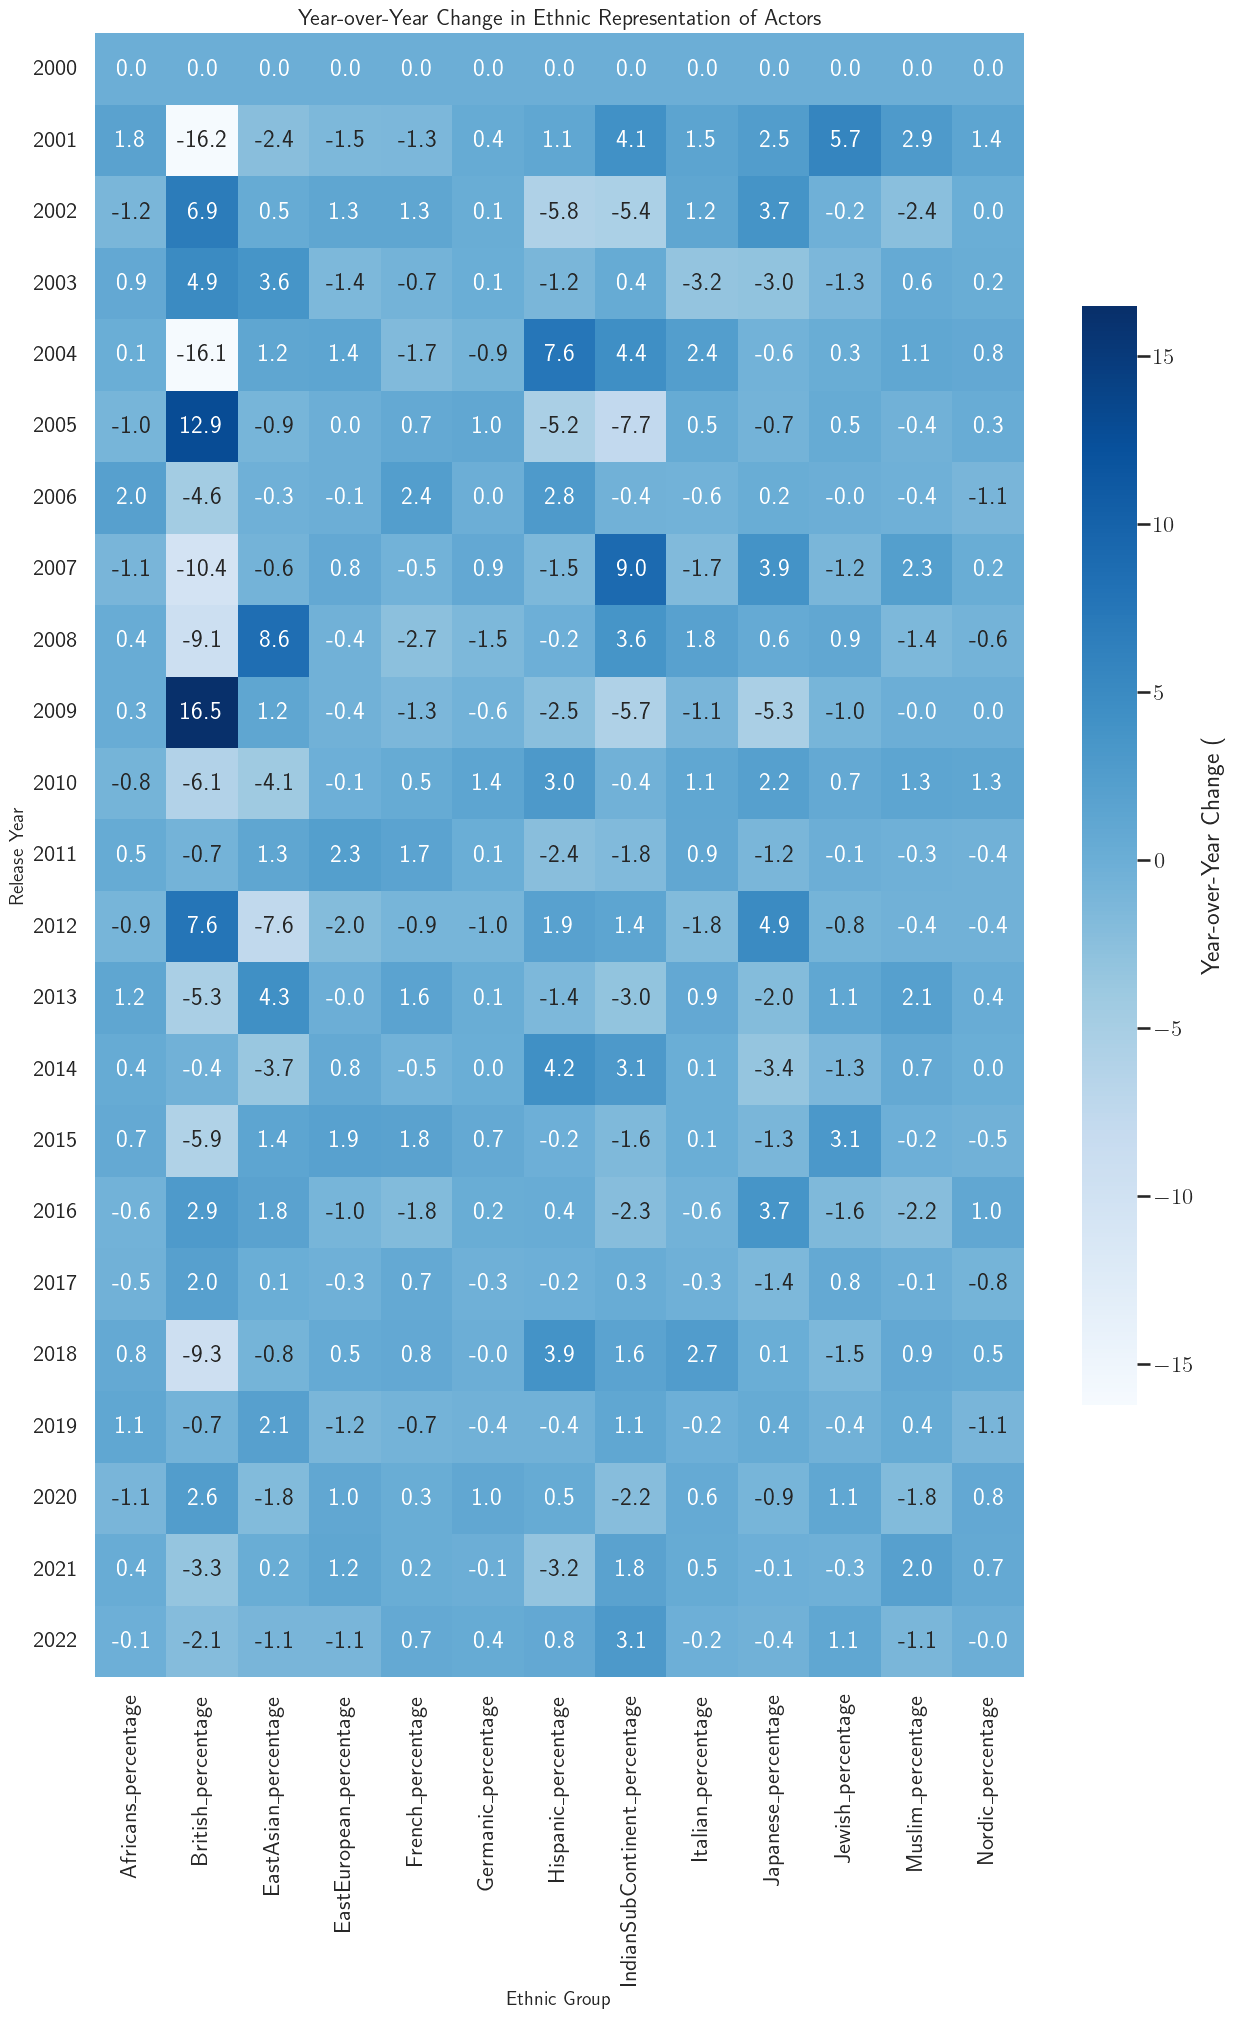

In [71]:
# Calculate the year-over-year change in percentage for each ethnic group
heatmap_data = ethnicity_pivot.set_index('release_year')[percentage_columns]
year_over_year_change = heatmap_data.diff().fillna(0)  # Calculate the difference and fill NaN values with 0 for the first year

# Set the figure size to make each cell approximately square
num_years = year_over_year_change.shape[0]
num_ethnic_groups = year_over_year_change.shape[1]
plt.figure(figsize=(num_ethnic_groups, num_years))

# Use a colorblind-friendly two-color gradient from gray (decrease) to blue (increase)
sns.heatmap(
    year_over_year_change,
    annot=True,
    fmt=".1f",
    cmap="Blues",  # Simple gradient from light to dark blue
    center=0,
    cbar_kws={'label': 'Year-over-Year Change (%)', 'shrink': 0.5},
    square=True
)

plt.title('Year-over-Year Change in Ethnic Representation of Actors', fontsize=16)
plt.xlabel('Ethnic Group', fontsize=14)
plt.ylabel('Release Year', fontsize=14)
plt.xticks(rotation=90)
plt.yticks(rotation=0)  # Rotate y-ticks to keep them horizontal
plt.tight_layout()
plt.savefig('dist/yoy_actor_ethnicity_heatmap.png', dpi=300)
plt.show()


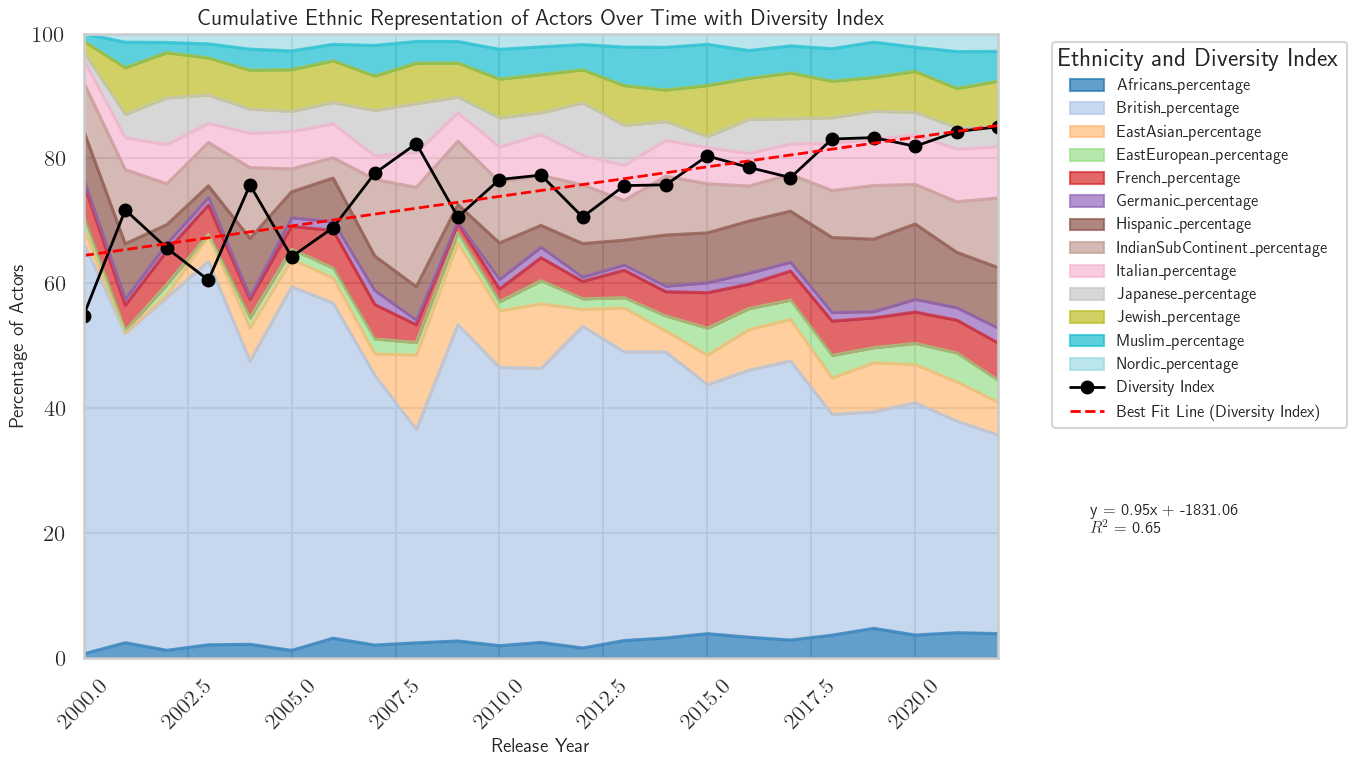

In [75]:
from scipy.stats import linregress

# Simpson's Diversity Index (1 - sum(p_i^2) for each group i in a given year)
ethnicity_pivot['diversity_index'] = (1 - (ethnicity_pivot[percentage_columns] / 100).pow(2).sum(axis=1)) * 100

plt.figure(figsize=(14, 8))

ethnicity_pivot.plot(
    x='release_year',
    y=percentage_columns,
    kind='area',
    stacked=True,
    colormap='tab20',
    alpha=0.7,
    ax=plt.gca()  # Use the current axis to allow overlay
)

plt.plot(
    ethnicity_pivot['release_year'],
    ethnicity_pivot['diversity_index'],
    color='black',
    linewidth=2,
    marker='o',
    label='Diversity Index'
)

slope, intercept, r_value, p_value, std_err = linregress(ethnicity_pivot['release_year'], ethnicity_pivot['diversity_index'])
best_fit_line = slope * ethnicity_pivot['release_year'] + intercept
r_squared = r_value**2  # R-squared value

plt.plot(
    ethnicity_pivot['release_year'],
    best_fit_line,
    color='red',
    linestyle='--',
    linewidth=2,
    label='Best Fit Line (Diversity Index)'
)

equation_text = f'y = {slope:.2f}x + {intercept:.2f}\n$R^2$ = {r_squared:.2f}'
plt.annotate(
    equation_text,
    xy=(1.10, 0.2),
    xycoords='axes fraction',
    fontsize=12,
    backgroundcolor='white'
)

plt.title('Cumulative Ethnic Representation of Actors Over Time with Diversity Index', fontsize=16)
plt.xlabel('Release Year', fontsize=14)
plt.ylabel('Percentage of Actors', fontsize=14)
plt.legend(title='Ethnicity and Diversity Index', fontsize=12, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xticks(rotation=45)
plt.xlim(2000, 2022)
plt.ylim(0, 100)
plt.tight_layout()

plt.savefig('dist/ethnicity_area_chart_with_best_fit.png', dpi=300)
plt.show()


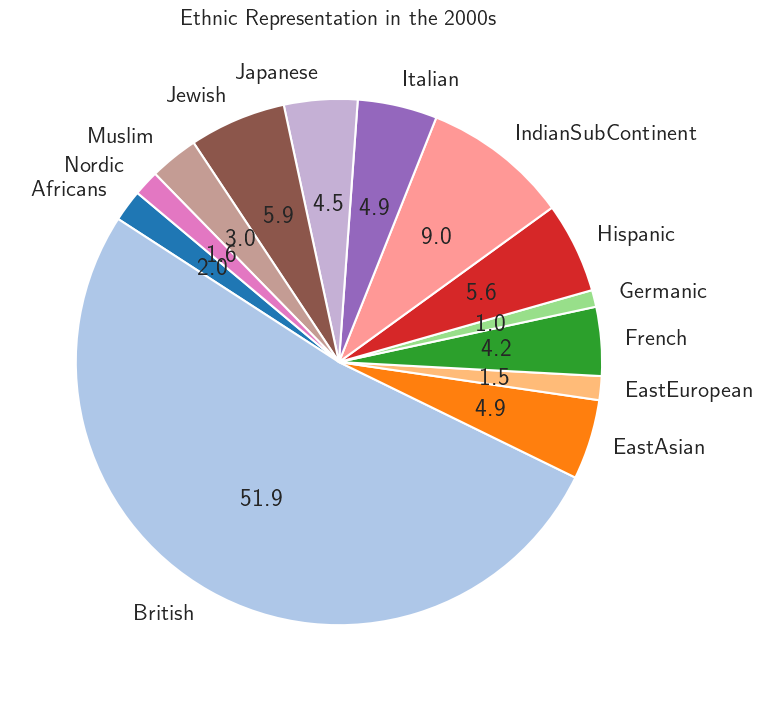

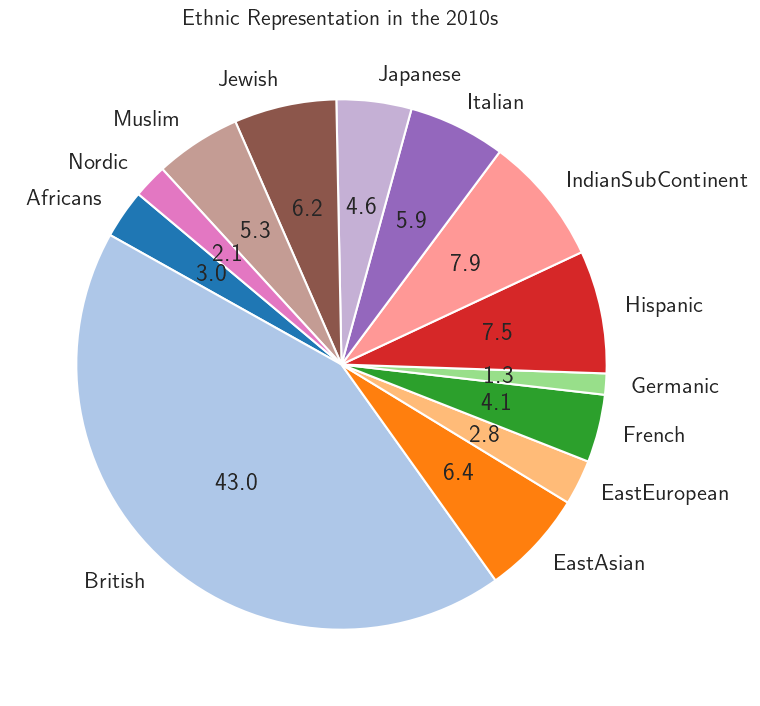

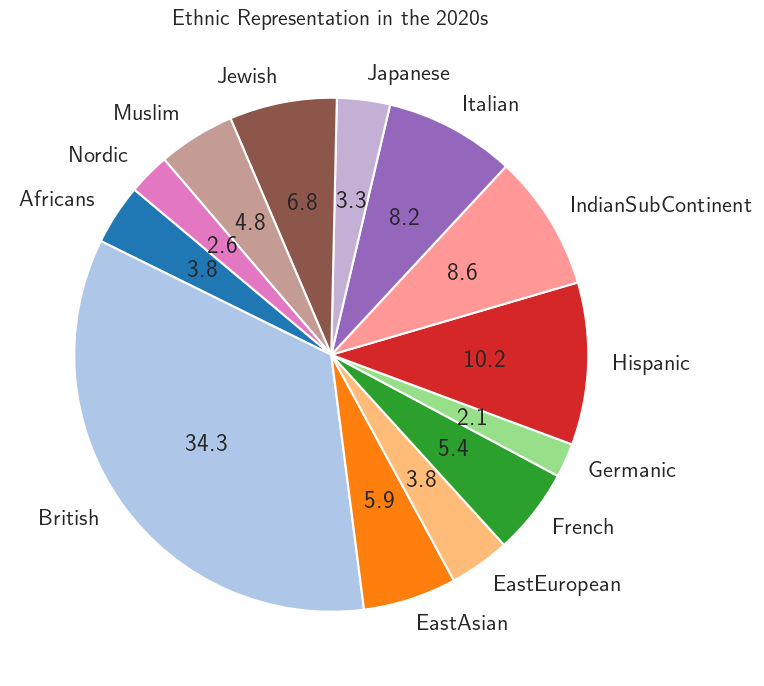

In [78]:
# Group by decade and calculate average percentages
ethnicity_pivot['decade'] = (ethnicity_pivot['release_year'] // 10) * 10
decade_data = ethnicity_pivot.groupby('decade')[percentage_columns].mean()

# Plot a pie chart for each decade
for decade, row in decade_data.iterrows():
    plt.figure(figsize=(8, 8))
    plt.pie(row, labels=[col.replace('_percentage', '') for col in percentage_columns], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('tab20'))
    plt.title(f'Ethnic Representation in the {decade}s', fontsize=16)
    plt.tight_layout()
    plt.show()


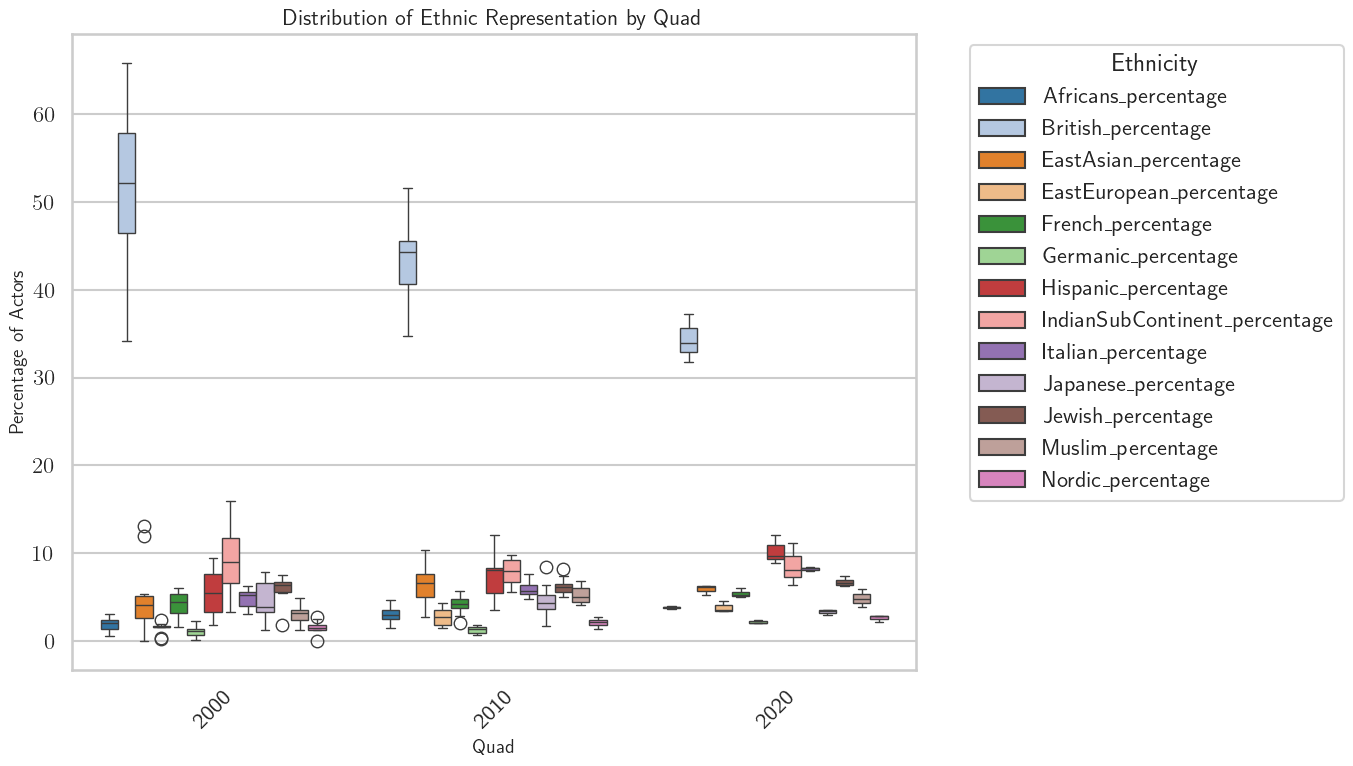

In [79]:
# Add a quad column and melt the DataFrame for easier plotting
ethnicity_pivot['quad'] = (ethnicity_pivot['release_year'] // 4) * 4
melted = pd.melt(ethnicity_pivot, id_vars='decade', value_vars=percentage_columns, var_name='Ethnicity', value_name='Percentage')

plt.figure(figsize=(14, 8))
sns.boxplot(data=melted, x='decade', y='Percentage', hue='Ethnicity', palette='tab20')
plt.title('Distribution of Ethnic Representation by Quad', fontsize=16)
plt.xlabel('Quad', fontsize=14)
plt.ylabel('Percentage of Actors', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Ethnicity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [80]:
print(credits.columns)
print(titles.columns)

Index(['person_id', 'id', 'name', 'character', 'role'], dtype='object')
Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score'],
      dtype='object')


In [81]:
actors_ethnicity

,last,first,release_year,"Asian,GreaterEastAsian,EastAsian","Asian,GreaterEastAsian,Japanese","Asian,IndianSubContinent","GreaterAfrican,Africans","GreaterAfrican,Muslim","GreaterEuropean,British","GreaterEuropean,EastEuropean","GreaterEuropean,Jewish","GreaterEuropean,WestEuropean,French","GreaterEuropean,WestEuropean,Germanic","GreaterEuropean,WestEuropean,Hispanic","GreaterEuropean,WestEuropean,Italian","GreaterEuropean,WestEuropean,Nordic",race,ethn
0,Niro,Robert,1976.0,0.012049,0.047031,0.029132,0.130213,0.014515,0.181015,0.013213,0.175831,0.139924,0.021544,0.048019,0.183441,0.004073,"GreaterEuropean,WestEuropean,Italian",Italian
1,Foster,Jodie,1976.0,0.006233,0.003345,0.002169,0.002873,0.001224,0.769263,0.001962,0.139924,0.041455,0.002859,0.013614,0.014196,0.000883,"GreaterEuropean,British",British
2,Brooks,Albert,1976.0,0.001535,0.001731,0.002256,0.001637,0.001051,0.796243,0.006969,0.079935,0.087334,0.012641,0.005697,0.002421,0.000550,"GreaterEuropean,British",British
3,Keitel,Harvey,1976.0,0.003191,0.013871,0.014180,0.007563,0.016137,0.337384,0.014394,0.379177,0.013641,0.012281,0.034139,0.016845,0.137198,"GreaterEuropean,Jewish",Jewish
4,Shepherd,Cybill,1976.0,0.000834,0.003329,0.000486,0.000593,0.000326,0.941884,0.000459,0.040002,0.004027,0.000100,0.003182,0.004027,0.000752,"GreaterEuropean,British",British
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51146,Sánchez,Ana,2021.0,0.001521,0.004827,0.000731,0.032521,0.023502,0.006762,0.002530,0.022107,0.027097,0.000771,0.863111,0.013792,0.000728,"GreaterEuropean,WestEuropean,Hispanic",Hispanic
51147,Buscato,Adelaida,2021.0,0.005693,0.013675,0.000519,0.033836,0.002570,0.051684,0.005362,0.024421,0.035855,0.006641,0.116075,0.701710,0.001960,"GreaterEuropean,WestEuropean,Italian",Italian
51148,Luengas,Luz,2021.0,0.067729,0.011413,0.001357,0.018831,0.000688,0.006802,0.010106,0.004465,0.161473,0.004081,0.707811,0.003891,0.001353,"GreaterEuropean,WestEuropean,Hispanic",Hispanic
51149,Prieto,Inés,2021.0,0.000202,0.031973,0.000078,0.002560,0.000454,0.002435,0.000177,0.002055,0.040193,0.000457,0.907115,0.012152,0.000151,"GreaterEuropean,WestEuropean,Hispanic",Hispanic
